# House keeping genes

Download from https://www.nature.com/articles/s41598-020-78863-5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [2]:
dat1 = pd.read_csv("../../1_FLAIRseq/reports/halflife_of_mESC_400uM_3h.2TC.tsv", sep="\t", index_col=0)
dat1 = dat1[dat1["GeneType"] == "protein_coding"]
dat1 = dat1[dat1["Total"] >= 10]
dat1 = dat1[(dat1["T"] > 0.5) & (dat1["T"] < 32)]
print("NanoNASC-seq genes: %d" % len(dat1))

NanoNASC-seq genes: 6143


70
House keeping: 53
Other: 6090
5.3027553036510884e-06


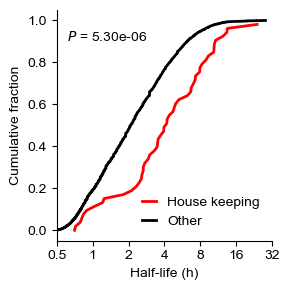

In [4]:
dat2 = pd.read_excel("data/mouse_house_keeping_genes_70.xlsx")
targets = set(dat2["Symbol"])
print(len(targets))

d1 = dat1[[gname in targets for gname in dat1["GeneName"]]]
d2 = dat1[[gname not in targets for gname in dat1["GeneName"]]]
print("House keeping:", len(d1))
print("Other:", len(d2))

def get_xy(vs):
    vs = list(sorted(vs))
    xs = vs
    ys = np.arange(len(xs)) / len(xs)
    return xs, ys

xs1, ys1 = get_xy(np.log2(d1["T"]))
xs2, ys2 = get_xy(np.log2(d2["T"]))
p = ks_2samp(xs1, xs2)[1]
print(p)

vmin, vmax = -1, 5
plt.figure(figsize=(3, 3))
plt.plot(xs1, ys1, color="red", lw=2, label="House keeping")
plt.plot(xs2, ys2, color="black", lw=2, label="Other")
plt.text(vmin + (vmax - vmin) * 0.05, 0.9, r"$P$ = %.2e" % p)
plt.xlabel("Half-life (h)")
plt.ylabel("Cumulative fraction")
xs = np.arange(vmin, vmax + 1)
plt.xticks(xs, [str(2**int(x)) for x in xs])
plt.xlim(vmin, vmax)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.legend(frameon=False, handlelength=1)
plt.tight_layout()
plt.savefig("figures/benchmark_halflife_mESC_house_keeping_genes.pdf")